In [396]:
# Import Appropriate Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge, Lasso

In [189]:
# Read the data from the csv file
df  = pd.read_csv("powerconsumption.csv") #Import the data into a dataframe
df.head() #Show the first lines of the dataframe


,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [191]:
# Explore the column names and the type of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [193]:
# Explore the Missing values
print(df.isnull().sum())

Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64


In [195]:
# Check the statistics of the data fields
df.describe()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


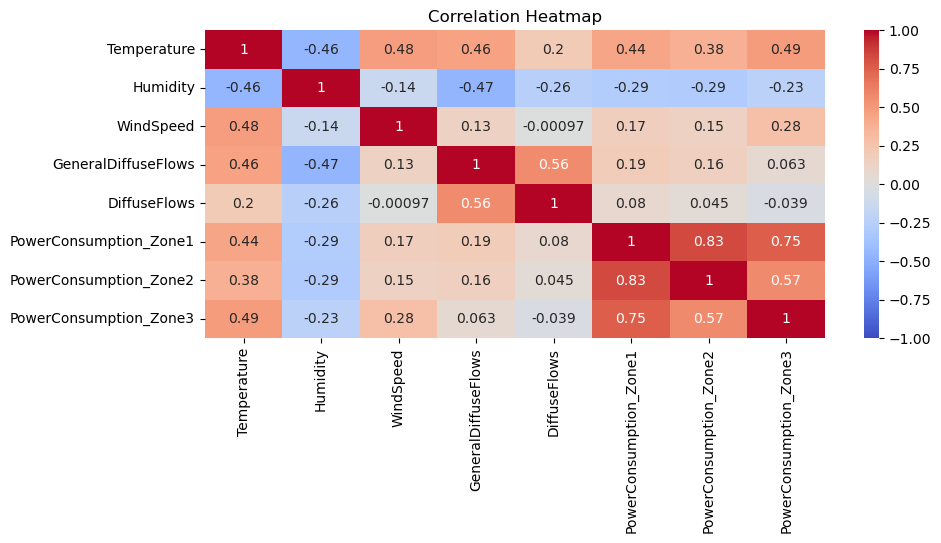

In [197]:
# Selecting numerical features only
df_numeric = df.select_dtypes(include=['float64'])

# Heatmap on numerical features
plt.figure(figsize=(10, 4))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

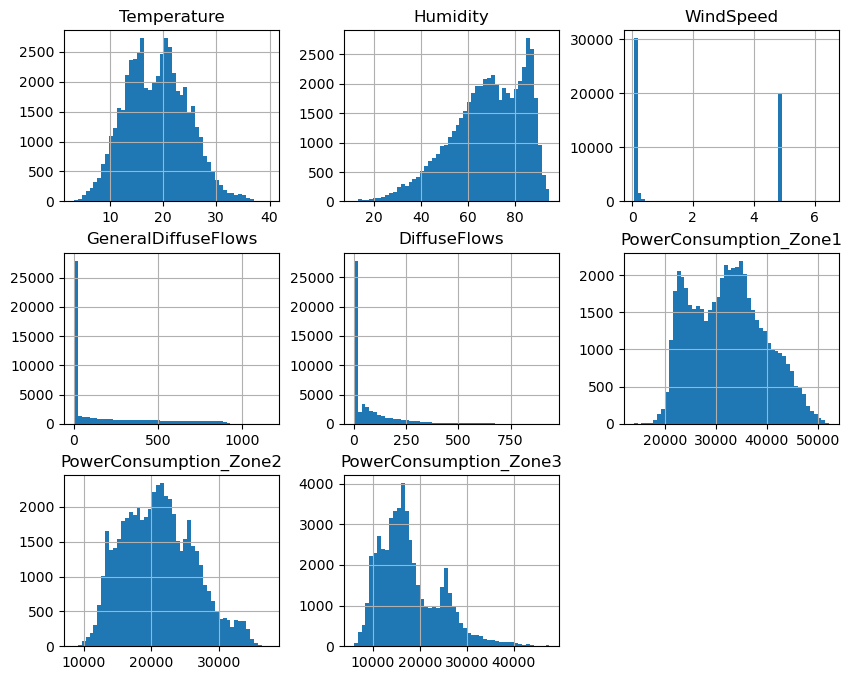

In [199]:
# Histogram for numerical variables
df_numeric.hist(bins=50, figsize=(10, 8))
plt.show()

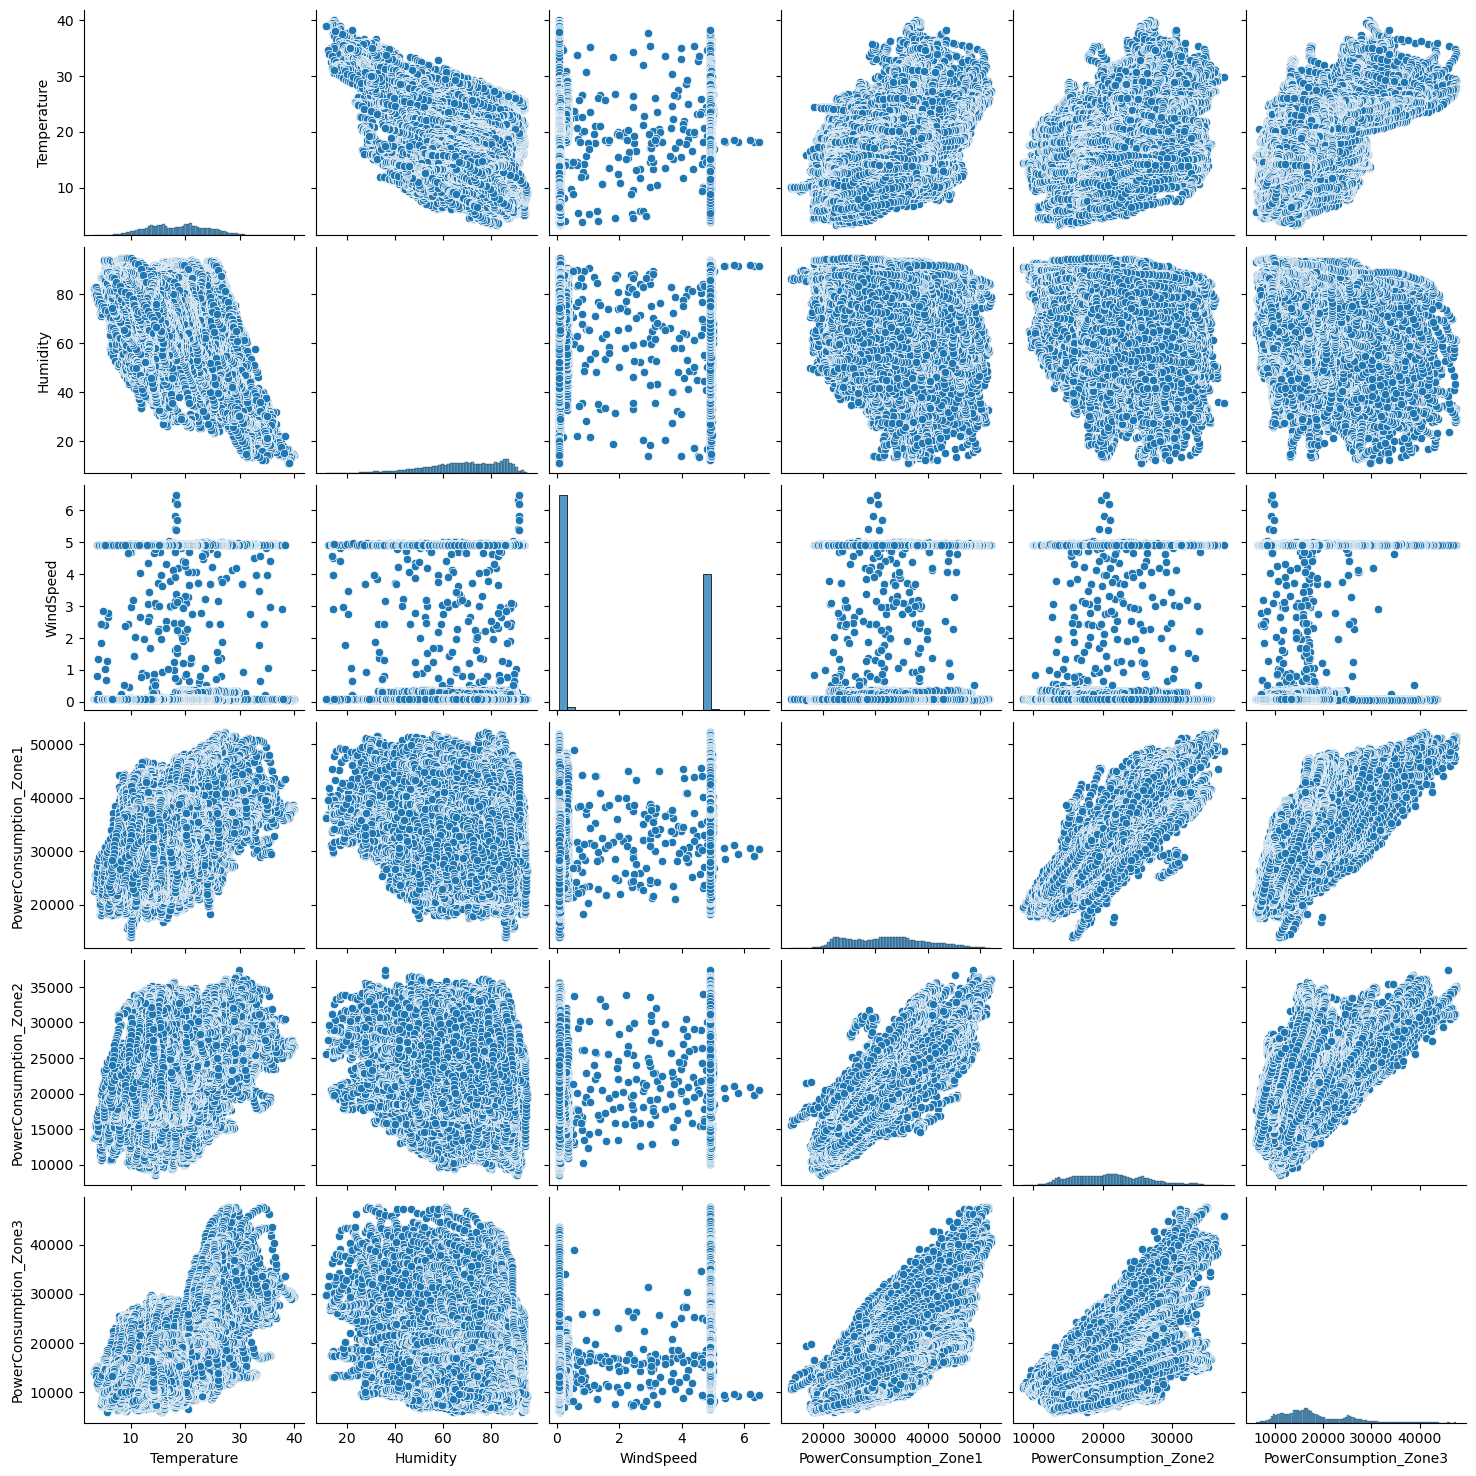

In [38]:
#Data Visualization
# Pairplot to visualize relationships between numerical columns
sns.pairplot(df[['Temperature', 'Humidity', 'WindSpeed', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']])
plt.show()

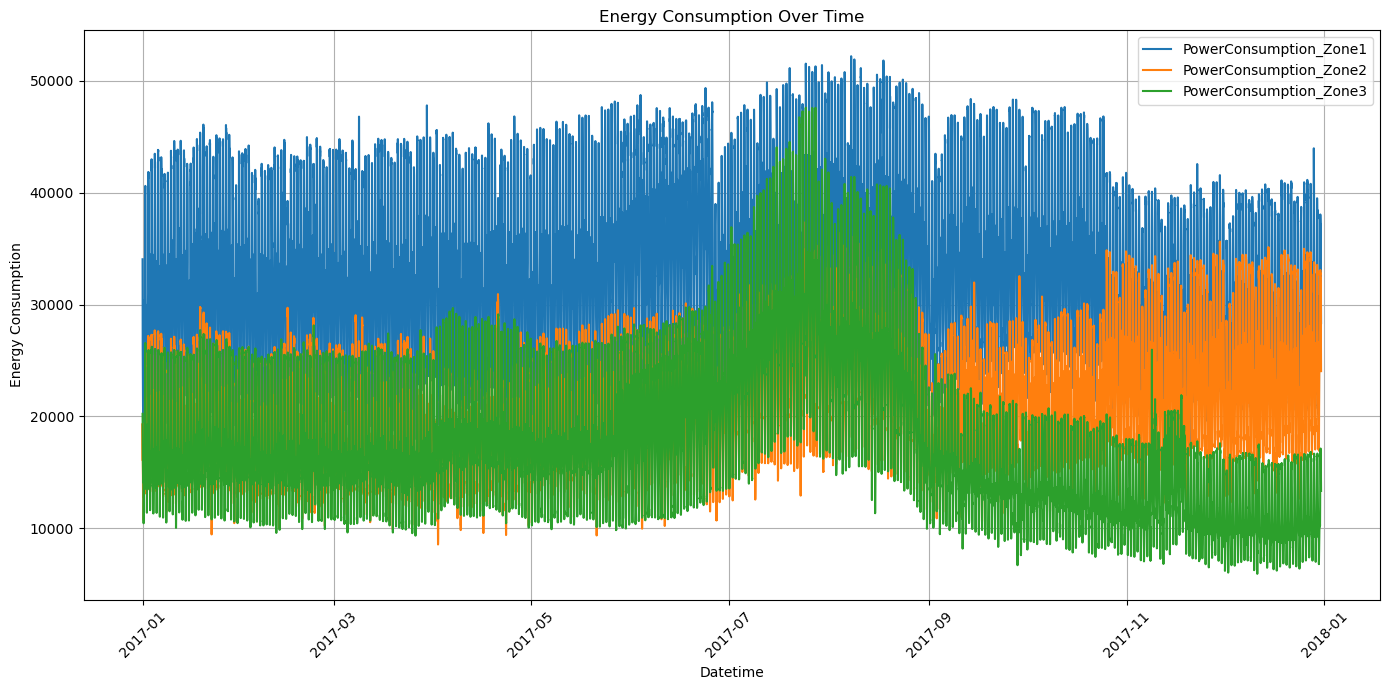

In [201]:
# Plotting energy consumption for the last three columns
# Convert the 'Datetime' column to datetime format. 

df['Datetime'] = pd.to_datetime(df['Datetime'])

plt.figure(figsize=(14, 7))

for col in df.columns[-3:]:  # Select the last three columns
    plt.plot(df['Datetime'], df[col], label=col)

plt.xlabel('Datetime')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


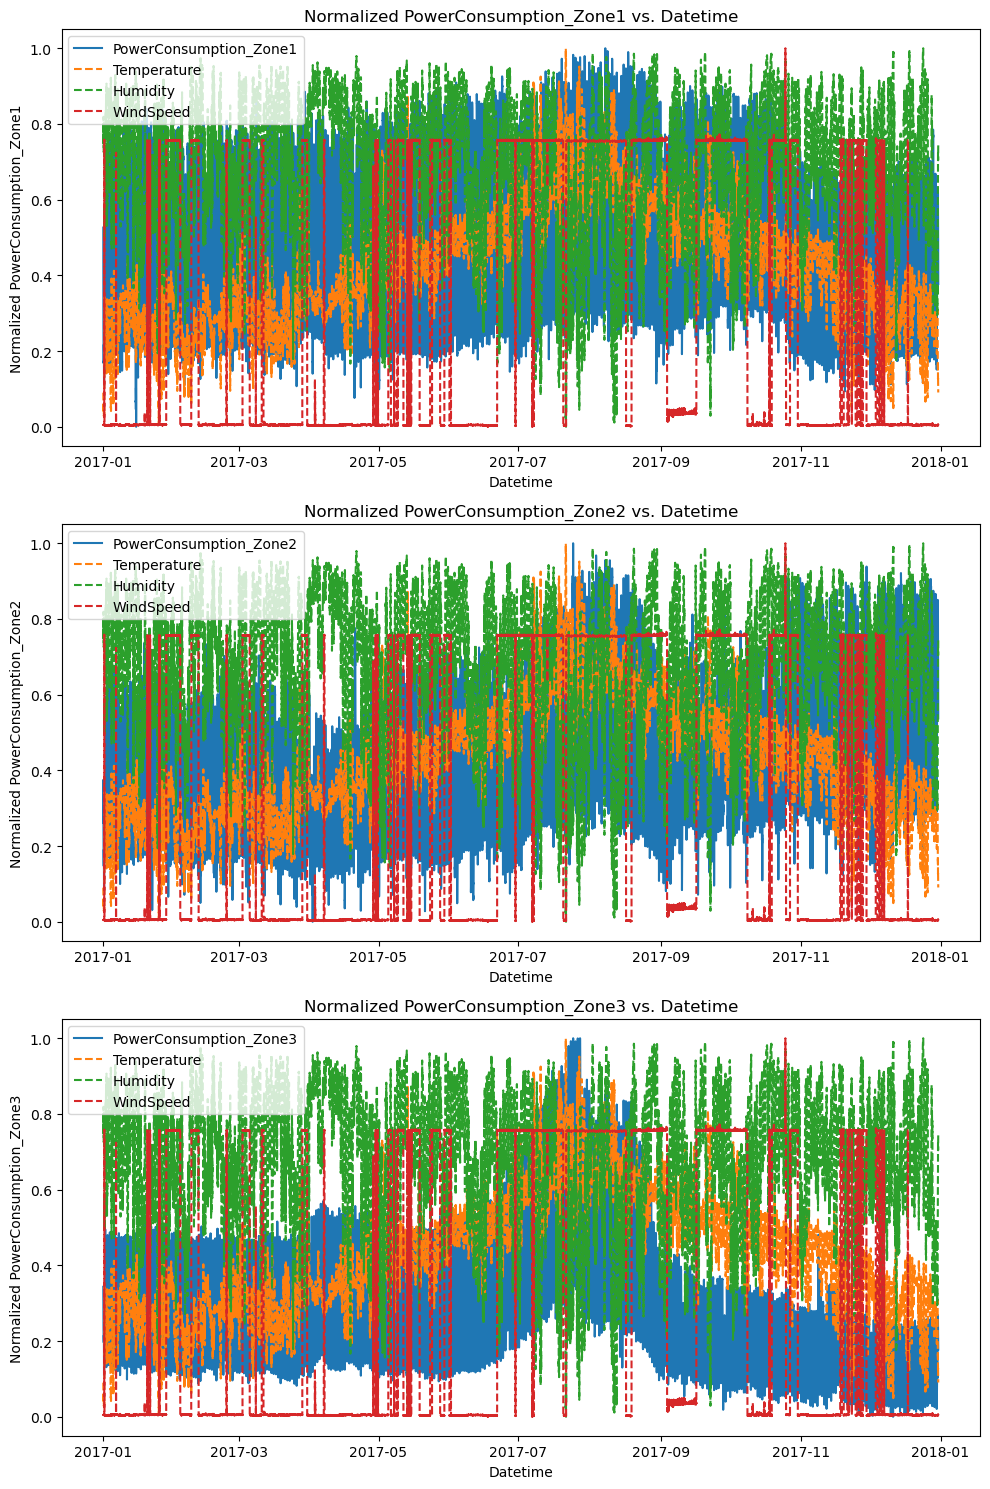

In [203]:
# Normalize all columns except 'Datetime' to be able to plot all imprortant variables on the same plot
numeric_cols = df.select_dtypes(include=np.number).columns
df_normalized = df.copy()
for col in numeric_cols:
    if col != 'Datetime':
        df_normalized[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# Plotting
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

last_three_cols = df_normalized.columns[-3:]

for i, col in enumerate(last_three_cols):
    axes[i].plot(df_normalized['Datetime'], df_normalized[col], label=col)
    axes[i].set_xlabel("Datetime")
    axes[i].set_ylabel(f"Normalized {col}")
    axes[i].set_title(f"Normalized {col} vs. Datetime")
    axes[i].legend()

    # Add Temperature, Humidity, and WindSpeed as a function of Datetime
    axes[i].plot(df_normalized['Datetime'], df_normalized['Temperature'], label='Temperature', linestyle='--')
    axes[i].plot(df_normalized['Datetime'], df_normalized['Humidity'], label='Humidity', linestyle='--')
    axes[i].plot(df_normalized['Datetime'], df_normalized['WindSpeed'], label='WindSpeed', linestyle='--')


    axes[i].legend()

plt.tight_layout()
plt.show()

In [398]:
# Determine if there are any duplicate rows to remove?
duplicate_rows = df[df.duplicated()]

if not duplicate_rows.empty:
  print("Duplicate rows found:")
  print(duplicate_rows)
else:
  print("No duplicate rows found.")

No duplicate rows found.


In [400]:
# Using sequential feature selection method to select most important parameters that affect the PowerConsumption_Zone1, PowerConsumption_Zone2, and PowerConsumption_Zone3
# Define features (X) and target variables (y)
X = df.drop(['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3', 'Datetime'], axis=1)
y = df[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']]

# Initialize the estimator (Linear Regression in this example)
estimator = LinearRegression()

# Initialize Sequential Feature Selector
sfs = SequentialFeatureSelector(estimator, n_features_to_select=3, direction='forward') # Adjust n_features_to_select

# Fit the SFS to your data
sfs.fit(X, y)

# Get the selected features
selected_features = list(X.columns[sfs.get_support()])

# Print the selected features
print("Selected features:", selected_features)

Selected features: ['Temperature', 'Humidity', 'WindSpeed']


In [402]:
#Scaling the target variables
scaler_y = StandardScaler()

# Fit and transform  y
y_scaled = scaler_y.fit_transform(y)

In [404]:
# Select Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y_scaled, test_size=0.2, random_state=42)

In [408]:
# Using Ridge Regression and GridSearchCV to Optimize the model 
pipeline = Pipeline([
    ('poly', PolynomialFeatures()), # Example degree, tune as needed
    ('scaler', MinMaxScaler()),
    ('ridge', Ridge())
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'poly__degree': [1, 2],  # Example degrees, adjust as needed
    'ridge__alpha': [0.01, 0.1, 1, 5, 10, 50, 100, 200, 500]  # Example alpha values, adjust as needed
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error') # Use 5-fold cross-validation

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the training and testing data using the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Evaluate the best model
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {train_rmse}")
print(f"Testing RMSE: {test_rmse}")
print(f"Training R^2: {train_r2}")
print(f"Testing R^2: {test_r2}")

# Print the coefficients of the best model
print("Coefficients of the best model:")
print(best_model.named_steps['ridge'].coef_)
print (best_model.named_steps['poly'].get_feature_names_out())


#Running one sample test for prediction
X_test_df = pd.DataFrame(np.array([[6.559, 73.8, 0.083]]), columns=selected_features)
Result_pred=best_model.predict(X_test_df)
inversed = scaler_y.inverse_transform(Result_pred)
print(f"The sample test: {inversed}")

Training RMSE: 0.8662472002835523
Testing RMSE: 0.8616285959986224
Training R^2: 0.24947281985476646
Testing R^2: 0.25291173552481516
Coefficients of the best model:
[[  0.          -3.97457144   0.04781376  -2.67788177   3.59303859
    3.1070159    0.23352208  -2.25301613  -0.87057995   3.91085749]
 [  0.          -6.41953039   0.30810171  -4.11636097   5.54200506
    3.08628025   0.84363154  -2.71360674  -0.3752001    4.7982331 ]
 [  0.         -11.35885033  -0.46819289  -7.31639109  10.63211145
    3.92258038   1.71040978  -1.65284291  -1.13086946   9.16070243]]
['1' 'Temperature' 'Humidity' 'WindSpeed' 'Temperature^2'
 'Temperature Humidity' 'Temperature WindSpeed' 'Humidity^2'
 'Humidity WindSpeed' 'WindSpeed^2']
The sample test: [[27609.31903459 19509.39348391 17057.21693604]]


In [410]:
# Using Lasso Regression and GridSearchCV to Optimize the model 
param_grid = {
    'poly__degree': [1, 2],  # Example degrees, adjust as needed
    'lasso__alpha': [0.01, 0.1, 1, 10, 100]  # Example alpha values, adjust as needed
}

# Create the pipeline with Lasso regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scaler', MinMaxScaler()),
    ('lasso', Lasso())
])

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error') # Use 5-fold cross-validation

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the training and testing data using the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Evaluate the best model
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {train_rmse}")
print(f"Testing RMSE: {test_rmse}")
print(f"Training R^2: {train_r2}")
print(f"Testing R^2: {test_r2}")

# Print the coefficients of the best model
print("Coefficients of the best model:")
print(best_model.named_steps['lasso'].coef_)
print (best_model.named_steps['poly'].get_feature_names_out())


#Running one sample test for prediction
X_test_df = pd.DataFrame(np.array([[6.559, 73.8, 0.083]]), columns=selected_features)
Result_pred=best_model.predict(X_test_df)
inversed = scaler_y.inverse_transform(Result_pred)
print(f"The sample test: {inversed}")

Training RMSE: 0.8880385271379067
Testing RMSE: 0.8825959270161481
Training R^2: 0.2117511925421873
Testing R^2: 0.2165728921098222
Coefficients of the best model:
[[ 0.          1.84863975 -0.         -0.          0.          0.23927985
   0.         -0.60742444 -0.         -0.        ]
 [ 0.          1.56811664 -0.          0.          0.          0.
   0.04474025 -0.6375324  -0.          0.        ]
 [ 0.          0.         -0.         -0.          2.5228103   0.
   0.41795044 -0.         -0.         -0.        ]]
['1' 'Temperature' 'Humidity' 'WindSpeed' 'Temperature^2'
 'Temperature Humidity' 'Temperature WindSpeed' 'Humidity^2'
 'Humidity WindSpeed' 'WindSpeed^2']
The sample test: [[27033.21959522 18039.81974147 13526.24236516]]
